# Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and Preprocess dataset

In [37]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("./adult.csv")
df.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [38]:
df.workclass.describe

<bound method NDFrame.describe of 0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object>

In [39]:
# Print first rows the dataset
print(df.head(1))

   age workclass  fnlwgt education  educational-num marital-status  \
0   25   Private  226802      11th                7  Never-married   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  


In [40]:
# Drop rows with any missing values
print(df.shape)
#for NaN values
df.dropna(inplace = True)
print(f"after droping nans: {df.shape}")

#eliminate ? values
for (column_name , _) in df.items():
    
    mask = df[f"{column_name}"] == '?'
    
    df = df[~mask]
    print(f"after droping ? valus from {column_name}: {df.shape} ")

print(f"final shape {df.shape}")

(48842, 15)
after droping nans: (48842, 15)
after droping ? valus from age: (48842, 15) 
after droping ? valus from workclass: (46043, 15) 
after droping ? valus from fnlwgt: (46043, 15) 
after droping ? valus from education: (46043, 15) 
after droping ? valus from educational-num: (46043, 15) 
after droping ? valus from marital-status: (46043, 15) 
after droping ? valus from occupation: (46033, 15) 
after droping ? valus from relationship: (46033, 15) 
after droping ? valus from race: (46033, 15) 
after droping ? valus from gender: (46033, 15) 
after droping ? valus from capital-gain: (46033, 15) 
after droping ? valus from capital-loss: (46033, 15) 
after droping ? valus from hours-per-week: (46033, 15) 
after droping ? valus from native-country: (45222, 15) 
after droping ? valus from income: (45222, 15) 
final shape (45222, 15)


# Visualize dataset

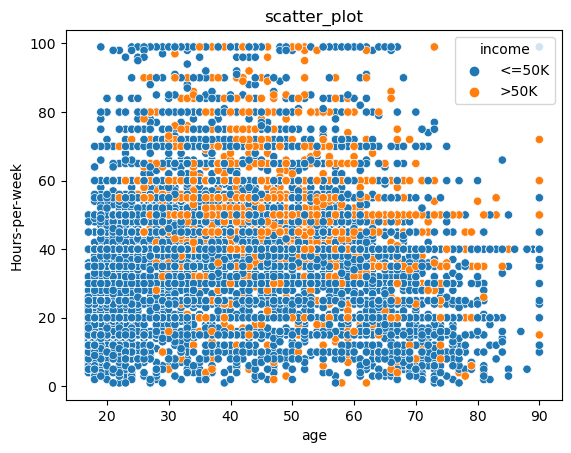

In [75]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income')
plt.title("scatter_plot");plt.xlabel("age");plt.ylabel("Hours-per-week");plt.show();

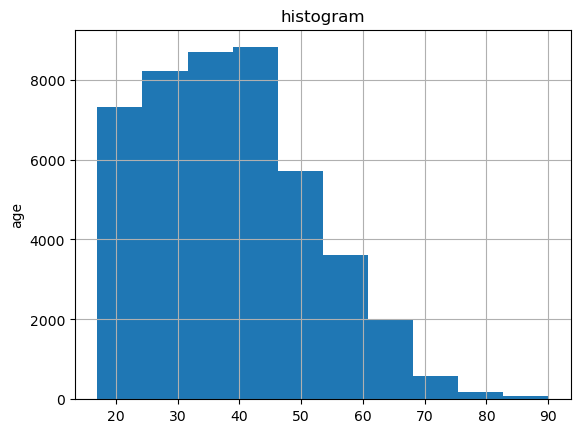

In [77]:
# Histogram for distribution of age distribution

histogram_values = df.age
histogram_values.hist()
plt.title("histogram");plt.ylabel("age");plt.show();

first quantile:  28.0
second quantile:  37.0
third quantile:  47.0
IQR (Q3 - Q1) :  19.0
LV:  -0.5


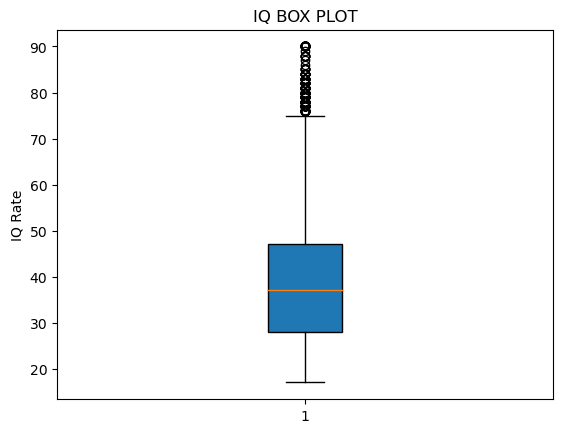

In [67]:
'''
    This function will calculate the quartiles and IQR,LV of given data sets and plot the boxplot as result.
'''
def box_plot(data):
    
    Q1 = np.quantile(data , 0.25)
    Q2 = np.quantile(data , 0.5)
    Q3 = np.quantile(data , 0.75)
    print("first quantile: ",Q1)
    print("second quantile: ",Q2)
    print("third quantile: ",Q3)

    iqr = Q3 - Q1
    print("IQR (Q3 - Q1) : ", iqr)

    LV = Q1 - (1.5 * iqr)
    print("LV: ",LV)
    
    plt.boxplot(data, patch_artist=True)
    plt.title("IQ BOX PLOT");plt.ylabel("IQ Rate");plt.show();
    
# Box plot for age to see outliers

box_plot(df.age)

plt.show()

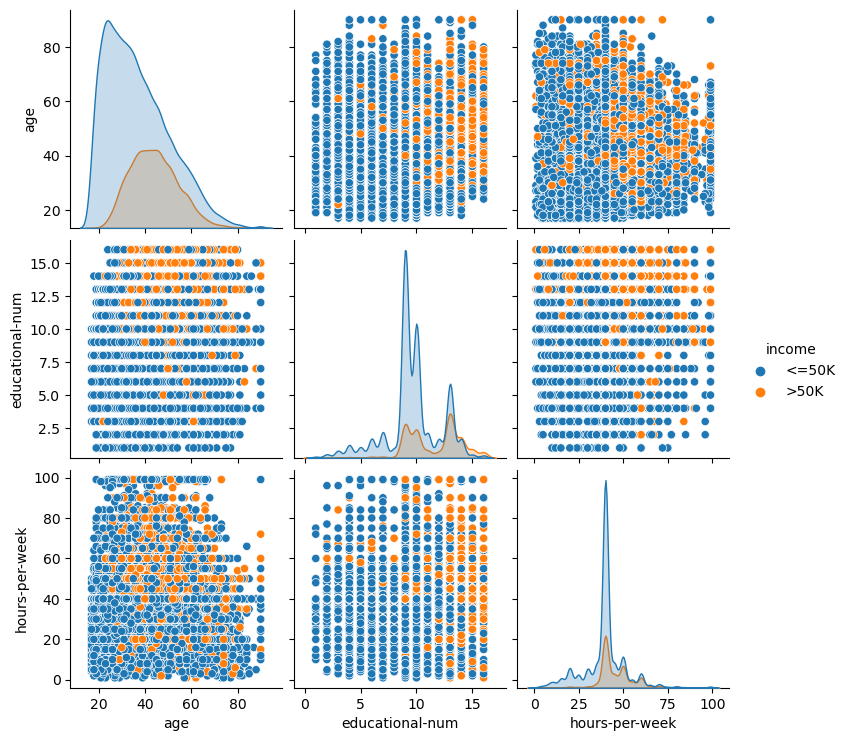

In [78]:
# Pair plot for Age, education-num, and hours-per-week

sns.pairplot(df, vars=['age', 'educational-num', 'hours-per-week'],hue='income')

plt.show()

# Encode and Normalize dataset

In [58]:
from sklearn.preprocessing import LabelEncoder 
# Use one-hot endcoding to convert categorical features into numerical format
df_encoded = df.copy()
for (column_name , _) in df_encoded.items(): 
    label = LabelEncoder()
    df_encoded[f"{column_name}"]= label.fit_transform(df_encoded[f"{column_name}"])
print(df_encoded)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0        8          2   18119          1                6               4   
1       21          2    3913         11                8               2   
2       11          1   23770          7               11               2   
3       27          2   10474         15                9               2   
5       17          2   15397          0                5               4   
...    ...        ...     ...        ...              ...             ...   
48837   10          2   20235          7               11               2   
48838   23          2    9896         11                8               2   
48839   41          2    9650         11                8               6   
48840    5          2   15752         11                8               4   
48841   35          3   21876         11                8               2   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [79]:
df_encoded.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,2,18119,1,6,4,6,3,2,1,0,0,39,38,0
1,21,2,3913,11,8,2,4,0,4,1,0,0,49,38,0
2,11,1,23770,7,11,2,10,0,4,1,0,0,39,38,1
3,27,2,10474,15,9,2,6,0,2,1,96,0,39,38,1
5,17,2,15397,0,5,4,7,1,4,1,0,0,29,38,0


In [80]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()

scaled_np = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(scaled_np, columns=df_encoded.columns)

scaled_df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.024983,-0.213443,0.705767,-2.439977,-1.221559,0.942936,0.007557,0.993798,-2.018744,0.693813,-0.281132,-0.207074,-0.076612,0.262999,-0.574031
1,-0.041455,-0.213443,-1.198073,0.179902,-0.438122,-0.390005,-0.489170,-0.884479,0.384110,0.693813,-0.281132,-0.207074,0.763057,0.262999,-0.574031
2,-0.798015,-1.257163,1.463096,-0.868050,0.737034,-0.390005,1.001011,-0.884479,0.384110,0.693813,-0.281132,-0.207074,-0.076612,0.262999,1.742067
3,0.412481,-0.213443,-0.318790,1.227853,-0.046403,-0.390005,0.007557,-0.884479,-2.018744,0.693813,3.732959,-0.207074,-0.076612,0.262999,1.742067
4,-0.344079,-0.213443,0.340974,-2.701964,-1.613277,0.942936,0.255921,-0.258387,0.384110,0.693813,-0.281132,-0.207074,-0.916282,0.262999,-0.574031
5,1.849945,1.873997,-1.031223,0.965865,1.912190,-0.390005,0.752648,-0.884479,0.384110,0.693813,1.851354,-0.207074,-0.748348,0.262999,1.742067
6,-1.100639,-0.213443,1.597514,1.227853,-0.046403,0.942936,0.255921,1.619890,0.384110,-1.441310,-0.281132,-0.207074,-0.076612,0.262999,-0.574031
7,1.244697,-0.213443,-1.026264,-1.392025,-2.396715,-0.390005,-0.985897,-0.884479,0.384110,0.693813,-0.281132,-0.207074,-2.595620,0.262999,-0.574031
8,2.001257,-0.213443,0.085136,0.179902,-0.438122,-0.390005,0.007557,-0.884479,0.384110,0.693813,3.314824,-0.207074,-0.076612,0.262999,1.742067
9,-0.192767,-2.300883,0.541865,-0.344074,1.128753,-0.390005,-1.482624,-0.884479,0.384110,0.693813,-0.281132,-0.207074,-0.076612,0.262999,-0.574031


# Implement PCA from Scratch

In [106]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.

#lets make sure that distribution is normal!
mean_vec = np.mean(scaled_df, axis=0)
df_centered = scaled_df - mean_vec

#covariance matrix
covariance_matrix = np.cov(df_centered, rowvar=False)

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

principal_components = sorted_eigenvectors[:, :2]
transformed = np.dot(X_centered, principal_components)

print("Transformed PAC Data:\n", transformed)

Transformed PAC Data:
 [[-2.04305553 -1.85861193]
 [ 0.6293085  -0.77595   ]
 [ 1.18731698 -0.33578539]
 ...
 [-1.96940211  0.87879054]
 [-1.91357303 -0.03309936]
 [ 0.61493054  2.06633392]]


# Visualize the PCA-reduced data

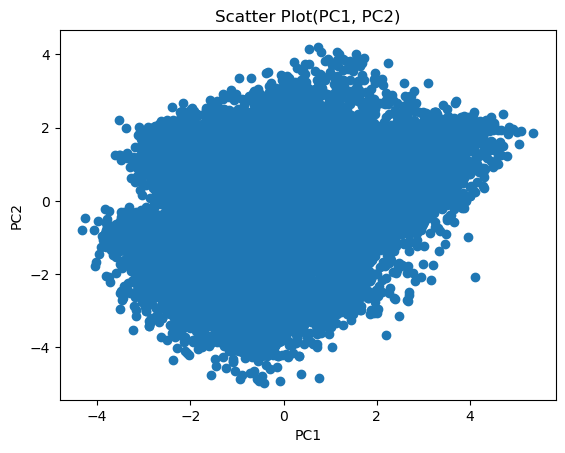

In [107]:
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.xlabel('PC1');plt.ylabel('PC2');plt.title('Scatter Plot(PC1, PC2)');plt.show();

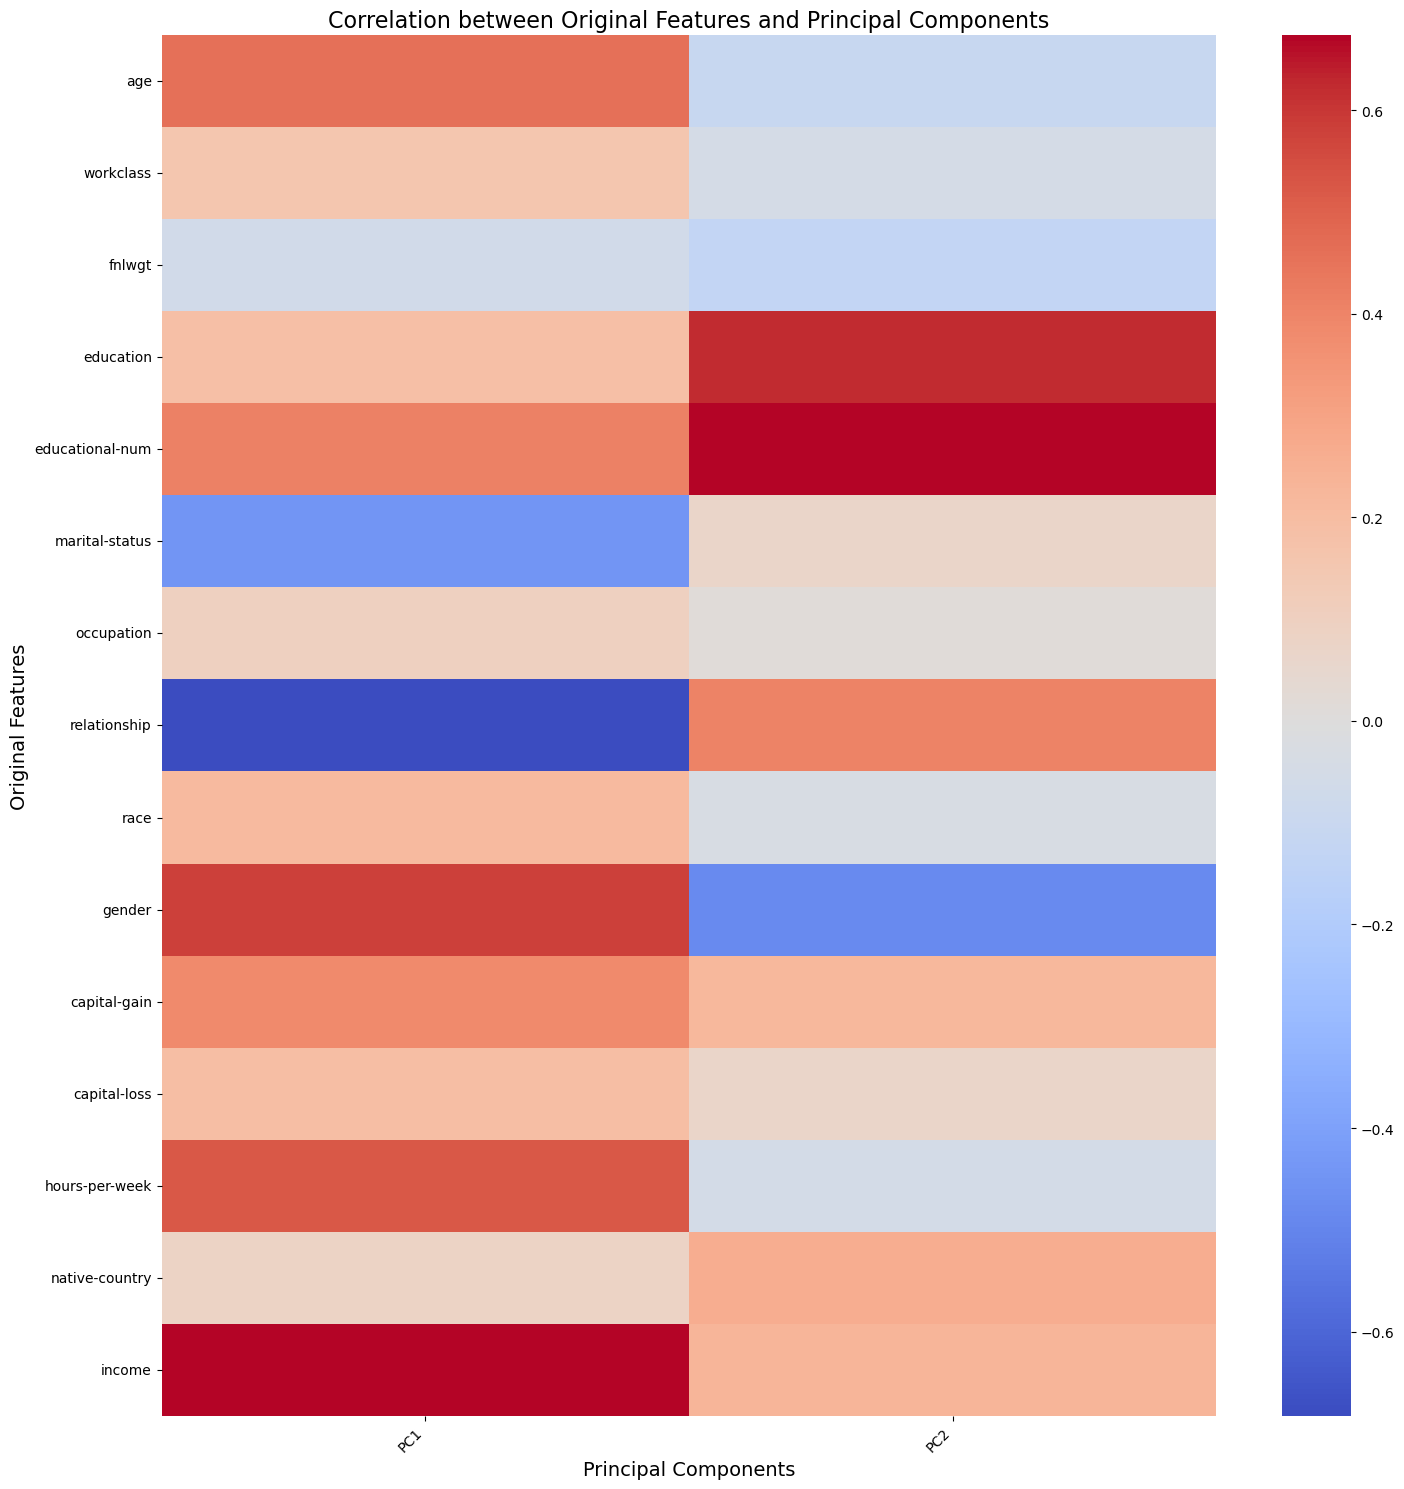

In [108]:
# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.
original_features = df_encoded.columns  
pca_components = ['PC1', 'PC2']

# here we will combine original scaled data and PCA result for correlation analysis
combined_data = np.hstack([scaled_np, transformed])
combined_df = pd.DataFrame(combined_data, columns=list(original_features) + pca_components)

#correlation matrix
correlation_matrix = combined_df.corr()
correlation_subset = correlation_matrix.loc[original_features, pca_components]

plt.figure(figsize=(15, 15)) 
ax = sns.heatmap(correlation_subset, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components', fontsize=16)
plt.xlabel('Principal Components', fontsize=14)
plt.ylabel('Original Features', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()